# Near real-time HF-Radar currents in the proximity of the Deepwater Horizon site.

Gulf of Mexico Oil Slick

Fire on the Deepwater Horizon, April 25, 2010
Credit: U.S. Coast Guard, Treehugger.com
On April 20, 2010, an explosion occurred on the semi-submersible offshore drilling rig Deepwater Horizon in the Gulf of Mexico. On April 24 it was found that the wellhead was damaged and was leaking oil into the Gulf. Coast Guard Rear Admiral Mary Landry has described it as "a very serious spill," leaking as many as 5,000 barrels of oil a day, or 210,000 gallons into the Gulf. Such a significant spill poses a serious threat to wildlife, affecting as many as 400 species all along the coastal areas of Louisiana, Mississippi, Alabama, and Florida. Source: Wikipedia. 


In [1]:
from IPython.display import IFrame

url = (
    'http://cordc.ucsd.edu/projects/mapping/maps/fullpage.php?'
    'll=29.061888,-87.373643&'
    'zm=7&'
    'mt=&'
    'rng=0.00,50.00&'
    'us=1&'
    'cs=4&'
    'res=6km_h&'
    'ol=3&'
    'cp=1'
)

IFrame(url, width=750, height=450)

In [2]:
import xarray as xr

url = (
    'http://hfrnet.ucsd.edu/thredds/dodsC/HFR/USEGC/6km/hourly/RTV/'
    'HFRADAR,_US_East_and_Gulf_Coast,_6km_Resolution,_Hourly_RTV_best.ncd'
)

ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:       (lat: 460, lon: 701, nProcParam: 7, nSites: 28, time: 48726)
Coordinates:
  * lat           (lat) float32 21.736 21.7899 21.8438 21.8978 21.9517 ...
  * lon           (lon) float32 -97.8839 -97.8258 -97.7677 -97.7096 -97.6516 ...
  * time          (time) datetime64[ns] 2012-01-01 2012-01-01T01:00:00 ...
    time_run      (time) datetime64[ns] 2012-01-01 2012-01-01T01:00:00 ...
Dimensions without coordinates: nProcParam, nSites
Data variables:
    site_lat      (nSites) float32 ...
    site_lon      (nSites) float32 ...
    site_code     (nSites) |S64 ...
    site_netCode  (nSites) |S64 ...
    procParams    (nProcParam) float32 ...
    time_offset   (time) datetime64[ns] ...
    u             (time, lat, lon) float32 ...
    v             (time, lat, lon) float32 ...
    DOPx          (time, lat, lon) float32 ...
    DOPy          (time, lat, lon) float32 ...
Attributes:
    netcdf_library_version:  4.1.3
    format_version:          HFRNet_1.0.0
    

In [3]:
from datetime import date, timedelta

yesterday = date.today() - timedelta(days=1)

ds = ds.sel(time=yesterday)

In [4]:
import numpy.ma as ma

u = ds['u'].data
v = ds['v'].data

lon = ds.coords['lon'].data
lat = ds.coords['lat'].data
time = ds.coords['time'].data

u = ma.masked_invalid(u)
v = ma.masked_invalid(v)

In [5]:
import numpy as np
from oceans import uv2spdir, spdir2uv


angle, speed = uv2spdir(u, v)
us, vs = spdir2uv(np.ones_like(speed), angle, deg=True)

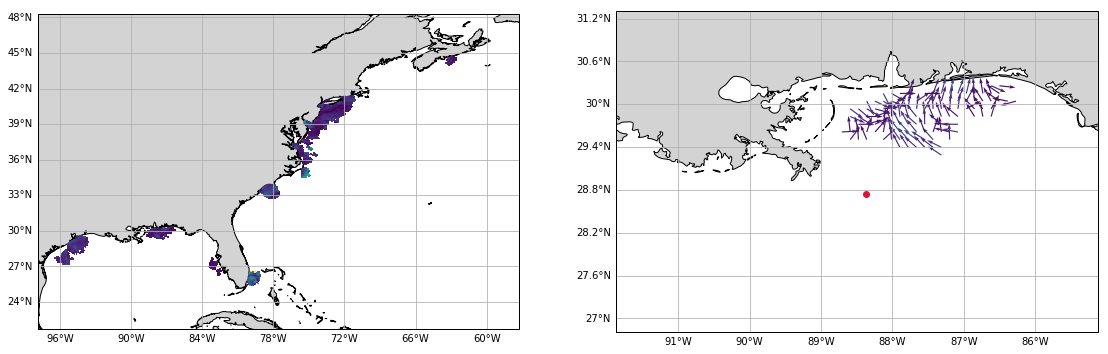

In [6]:
%matplotlib inline

import cartopy.crs as ccrs
import matplotlib.pyplot as plt

from cartopy import feature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

LAND = feature.NaturalEarthFeature(
    'physical', 'land', '10m',
    edgecolor='face',
    facecolor='lightgray'
)

sub = 2
center = -87.373643, 29.061888
bbox = lon.min(), lon.max(), lat.min(), lat.max()

fig, (ax0, ax1) = plt.subplots(
    ncols=2,
    figsize=(19, 11),
    subplot_kw=dict(projection=ccrs.PlateCarree())
)


ax0.set_extent(bbox)
ax0.pcolormesh(lon, lat, ma.masked_invalid(speed))

gl0 = ax0.gridlines(draw_labels=True)
gl0.xlabels_top = gl0.ylabels_right = False
gl0.xformatter = LONGITUDE_FORMATTER
gl0.yformatter = LATITUDE_FORMATTER

ax0.add_feature(LAND, zorder=0, edgecolor='black')

dx = dy = 2.25
ax1.set_extent([center[0]-dx-dx, center[0]+dx, center[1]-dy, center[1]+dy])
ax1.quiver(
    lon[::sub], lat[::sub],
    us[::sub, ::sub], vs[::sub, ::sub],
    speed[::sub, ::sub], scale=30
)

# Deepwater Horizon site.
ax1.plot(-88.365997, 28.736628, marker='o', color='crimson')
gl1 = ax1.gridlines(draw_labels=True)
gl1.xlabels_top = gl1.ylabels_right = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER

feature = ax1.add_feature(LAND, zorder=0, edgecolor='black')